Chromatin immuneprecipitation sequencing (ChipSeq) is a method to identify genome-wide DNA binding sites for a protein of interest. It is often used to determine the binding sites for transcription factors, DNA-binding enzymes, histones, chaperones, or nucleosomes. The workflow to produce the ChipSeq data starts from the cross-links bound proteins and chromatin. The chromatin is fragmented, and the DNA fragments bound to one protein are captured using an antibody specific to it. The ends of the captured fragments are sequenced using NGS. The computational mapping of the sequenced DNA leads to the identification of the genomic locations of these fragments, illuminating their role in DNA protein interactions and epigenetics research. The ChipSeq data consists of short reads in a FASTQ file format. There is a short read after every fifth line of the file. This part will deal with the analysis of the ChipSeq data in R.

染色质免疫沉淀测序（ChipSeq）是鉴定感兴趣蛋白质的全基因组DNA结合位点的方法。它通常用于确定转录因子，DNA结合酶，组蛋白，分子伴侣或核小体的结合位点。产生ChipSeq数据的工作流程从交联蛋白和染色质开始。染色质被片段化，并且使用对其特异性的抗体捕获与一种蛋白质结合的DNA片段。捕获片段的末端使用NGS进行测序。测序DNA的计算作图导致鉴定这些片段的基因组位置，阐明它们在DNA蛋白质相互作用和表观遗传学研究中的作用。ChipSeq数据由FASTQ文件格式的短读取组成。文件的每五行之后都有一个简短的读取。这部分内容是在R中分析ChipSeq数据。

1. Start with the loading of the required R libraries. You need two libraries, namely chipseq and TxDb.Mmusculus.UCSC.mm9.knownGene, as follows:

 加载chipseq和TxDb.Mmusculus.UCSC.mm9.knownGene

In [1]:
source("http://bioconductor.org/biocLite.R")
biocLite(c("chipseq"))

Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help
A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.1 (2018-07-02).
Installing package(s) 'chipseq'
Warning message in readRDS(dest):
"lzma decoding result 10"Warning message in readRDS(dest):
"lzma decoding result 10"

package 'chipseq' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmp8IllVH\downloaded_packages


Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'broom',
  'callr', 'caret', 'checkpoint', 'class', 'cli', 'clipr', 'codetools',
  'colorspace', 'curl', 'data.table', 'dbplyr', 'ddalpha', 'digest', 'dimRed',
  'doParallel', 'dplyr', 'evaluate', 'fansi', 'forcats', 'foreign', 'geometry'


In [2]:
biocLite(c("TxDb.Mmusculus.UCSC.mm9.knownGene"))

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.1 (2018-07-02).
Installing package(s) 'TxDb.Mmusculus.UCSC.mm9.knownGene'
installing the source package 'TxDb.Mmusculus.UCSC.mm9.knownGene'

Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager', 'broom',
  'callr', 'caret', 'checkpoint', 'class', 'cli', 'clipr', 'codetools',
  'colorspace', 'curl', 'data.table', 'dbplyr', 'ddalpha', 'digest', 'dimRed',
  'doParallel', 'dplyr', 'evaluate', 'fansi', 'forcats', 'foreign', 'geometry'


In [3]:
library(TxDb.Mmusculus.UCSC.mm9.knownGene)

Loading required package: GenomicFeatures
Warning message:
"package 'GenomicFeatures' was built under R version 3.5.2"Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, un

In [4]:
library(chipseq)

Loading required package: ShortRead
Loading required package: BiocParallel
Warning message:
"package 'BiocParallel' was built under R version 3.5.2"Loading required package: Biostrings
Loading required package: XVector

Attaching package: 'Biostrings'

The following object is masked from 'package:base':

    strsplit

Loading required package: Rsamtools
Loading required package: GenomicAlignments
Warning message:
"package 'GenomicAlignments' was built under R version 3.5.2"Loading required package: SummarizedExperiment
Loading required package: DelayedArray
Loading required package: matrixStats
Warning message:
"package 'matrixStats' was built under R version 3.5.2"
Attaching package: 'matrixStats'

The following objects are masked from 'package:Biobase':

    anyMissing, rowMedians


Attaching package: 'DelayedArray'

The following objects are masked from 'package:matrixStats':

    colMaxs, colMins, colRanges, rowMaxs, rowMins, rowRanges

The following object is masked from 'package:

2. Now, you need the data to be analyzed. For demonstration purposes, use the built-in package dataset named cstest as follows:

 使用R包内部数据：

In [5]:
data(cstest)

3. Take a look at the data by typing the following command before you start analyzing it:

 查看数据：

In [6]:
cstest

GRangesList object of length 2:
$ctcf 
GRanges object with 450096 ranges and 0 metadata columns:
           seqnames              ranges strand
              <Rle>           <IRanges>  <Rle>
       [1]    chr10     3012936-3012959      +
       [2]    chr10     3012941-3012964      +
       [3]    chr10     3012944-3012967      +
       [4]    chr10     3012955-3012978      +
       [5]    chr10     3012963-3012986      +
       ...      ...                 ...    ...
  [450092]    chr12 121239376-121239399      -
  [450093]    chr12 121245849-121245872      -
  [450094]    chr12 121245895-121245918      -
  [450095]    chr12 121246344-121246367      -
  [450096]    chr12 121253499-121253522      -

...
<1 more element>
-------
seqinfo: 35 sequences from an unspecified genome

4. Now, estimate the length of the fragments in the data by typing the following command:

 评估数据中片段的长度：

In [7]:
estimate.mean.fraglen(cstest$ctcf)

chr10    chr11    chr12 
179.6794 172.4884 181.6732

5. Extend your fragments in order to cover the binding sites in the sequences. Use an extension length inspired by the fragment lengths in the last step (length =200 > estimate.mean.fraglen(cstest$ctcf)) as follows:

 扩展片段一覆盖序列中的结合位点：

In [8]:
ctcf_ext <- resize(cstest$ctcf, width = 200)

In [9]:
gfp_ext <- resize(cstest$gfp, width = 200)

A useful summary of this information is the coverage, that is, how many times each base in the genome was covered by one of these intervals and can be computed as follows:
 
 这个信息的一个有用的总结是覆盖率，即基因组中每个碱基被这些区间覆盖的次数，可以计算如下：

In [25]:
cov_ctcf <- coverage(ctcf_ext)
cov_ctcf

RleList of length 35
$chr1
integer-Rle of length 197195432 with 1 run
  Lengths: 197195432
  Values :         0

$chr2
integer-Rle of length 181748087 with 1 run
  Lengths: 181748087
  Values :         0

$chr3
integer-Rle of length 159599783 with 1 run
  Lengths: 159599783
  Values :         0

$chr4
integer-Rle of length 155630120 with 1 run
  Lengths: 155630120
  Values :         0

$chr5
integer-Rle of length 152537259 with 1 run
  Lengths: 152537259
  Values :         0

...
<30 more elements>

In [11]:
cov_gfp <- coverage(gfp_ext)

6. Now, create a plot called islands for the regions of interest with the following functions. They are contiguous segments:

 对感兴趣的区域作图：

In [26]:
library(lattice)
par(mfrow = c(2, 1))

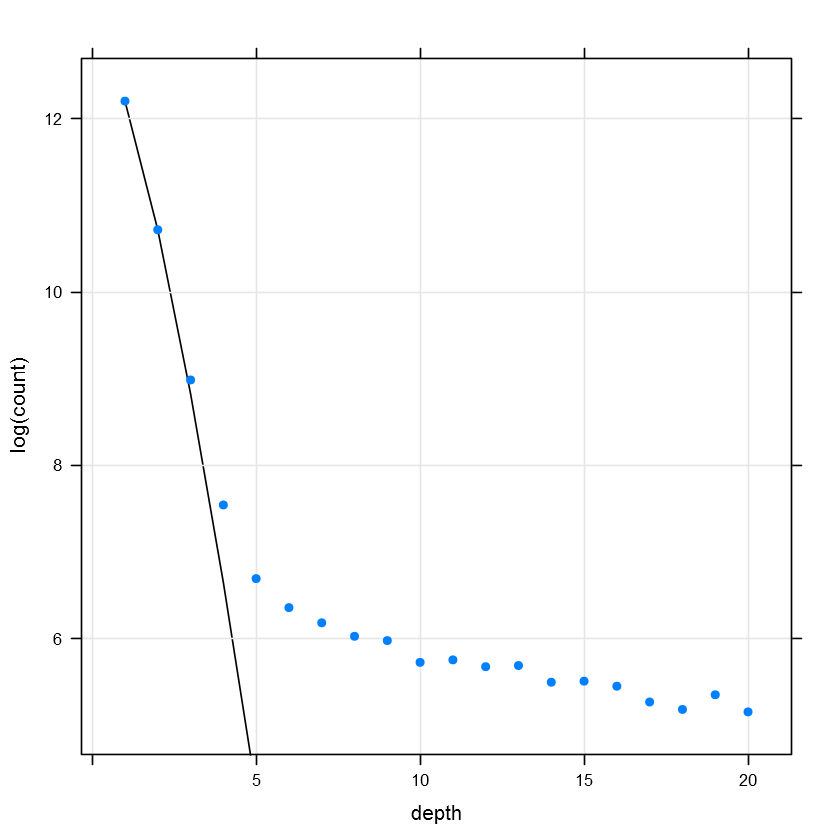

In [27]:
islandDepthPlot(cov_ctcf)

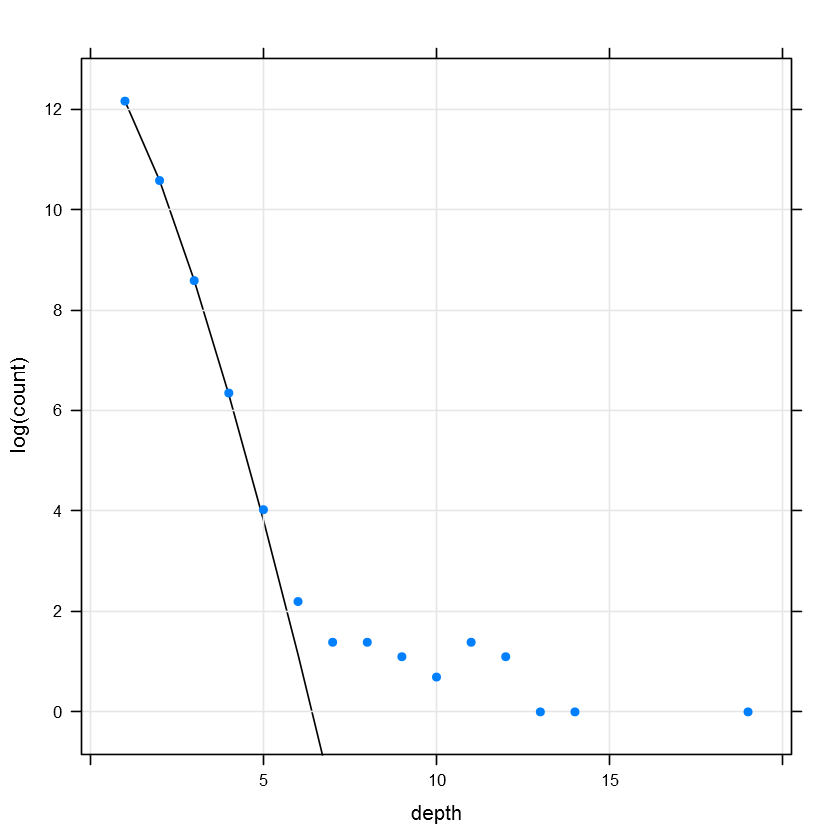

In [28]:
islandDepthPlot(cov_gfp)

7. Now, compute the peak's cut off for a desired fdr (here, 0.01) as follows:

 计算所需fdr的峰值的阈值：

In [15]:
peakCutoff(cov_ctcf, fdr = 0.01)

[1] 5.091909

In [16]:
peakCutoff(cov_gfp, fdr = 0.01)

[1] 6.979273

8. With this value, decide a cut-off value (7) to be used in order to get the peaks with high coverage in the segments of the data for both lanes, ctcf and gfp, as follows(note that the chosen cut off is based on your computation above 5.09 and 6.97):

 用这个值，决定一个阈值（7），用来获得数据段中包含高覆盖率的峰值，ctcf和gfp（注意，选择的截止值是基于5.09以上的计算和6.97）：

In [17]:
peaks_ctcf <- slice(cov_ctcf, lower = 7)

In [18]:
peaks_gfp <- slice(cov_gfp, lower = 7)

9. Now, compute the differential peaks with the following function to determine which peaks are different in the two samples:

 计算不同峰值来决定这两个样本中哪些峰值是不一样的：

In [19]:
peakSummary <- diffPeakSummary(peaks_gfp, peaks_ctcf)

In [20]:
head(data.frame(peakSummary))

Warning message in as.data.frame(x, row.names = NULL, optional = optional, ...):
"'optional' and arguments in '...' ignored"

space,start,end,width,comb.max,sums1,sums2,maxs1,maxs2
chr10,3012944,3013140,197,11,0,1911,0,11
chr10,3135027,3135029,3,7,0,21,0,7
chr10,3234798,3234896,99,10,0,910,0,10
chr10,3234924,3234933,10,7,0,70,0,7
chr10,3270010,3270301,292,20,164,4072,1,19
chr10,3277660,3277861,202,13,0,1897,0,13


10. Visualize the results in terms of an XY plot as follows:

 可视化结果：

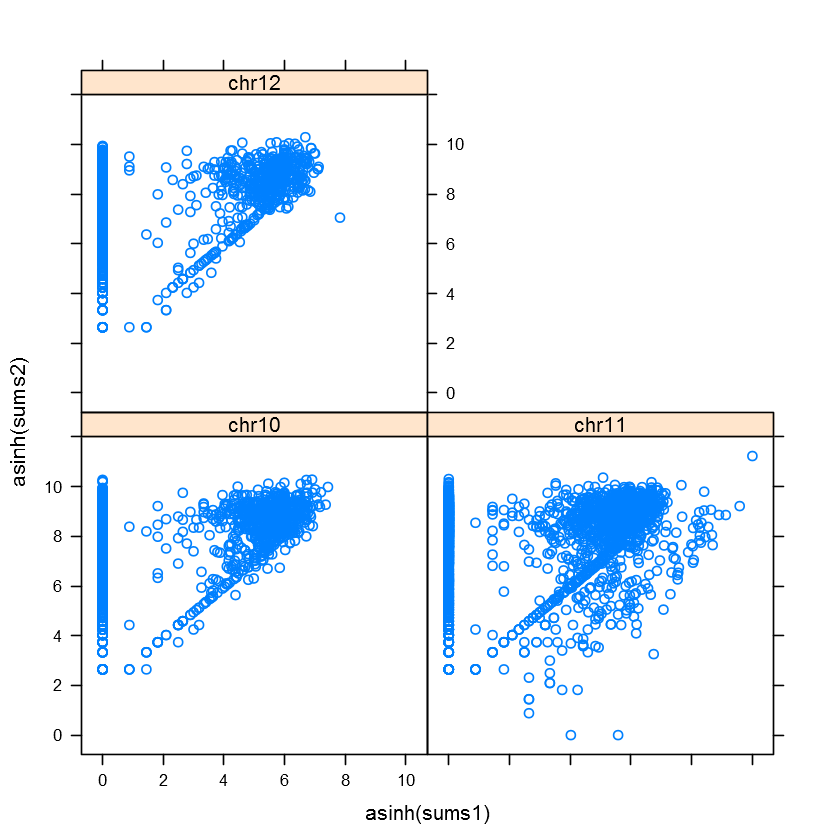

In [30]:
xyplot(asinh(sums2) ~ asinh(sums1) | space, data = as.data.frame(peakSummary))

11. Now, you have the peaks of your interest. Find if they are in the region of interest (promoter region) using the following commands:

 找到自己感兴趣的区域（启动子区域）：

In [31]:
gregions <- transcripts(TxDb.Mmusculus.UCSC.mm9.knownGene)

In [32]:
promoters <- flank(gregions, 1000, both = TRUE)

In [33]:
peakSummary$inPromoter <- peakSummary %over% promoters

Warning message:
"Calling findOverlaps() with a RangedData query and a GenomicRanges
  subject is deprecated and this functionality won't be replaced. Please
  migrate your code to use GRanges or GRangesList objects instead.
  RangedData objects will be deprecated soon (their use has been
  discouraged since BioC 2.12, that is, since 2014). See IMPORTANT NOTE
  in ?RangedData"Warning message:
"The seqinfo() getter for RangedData objects is deprecated and won't be
  replaced. Please migrate your code to use GRanges or GRangesList
  objects instead. RangedData objects will be deprecated soon (their use
  has been discouraged since BioC 2.12, that is, since 2014). See
  IMPORTANT NOTE in ?RangedData"

12. Take a look at the peaks in the promoter region by looking at the object created in the previous step as follows:

 通过查看前面步骤中创建的对象，查看启动程序区域中的峰值:

In [34]:
which(peakSummary$inPromoter)

[1]    2   14   41   51  100  101  110  124  126  130  133  141  155  156  157
 [16]  158  175  176  177  180  184  185  211  212  213  217  218  257  273  276
 [31]  299  306  307  315  318  319  325  327  328  358  361  362  370  371  375
 [46]  381  386  432  456  460  461  493  499  502  513  527  555  556  566  595
 [61]  596  604  606  607  621  622  623  628  652  657  663  665  676  696  697
 [76]  701  710  715  725  824  825  877  900  914  915  918  919  925  938  942
 [91]  963  976  977  993  996  998 1008 1027 1033 1034 1036 1037 1040 1051 1052
[106] 1055 1056 1057 1059 1067 1068 1071 1072 1076 1079 1080 1087 1091 1108 1109
[121] 1110 1112 1114 1115 1124 1127 1131 1144 1159 1166 1175 1182 1195 1211 1226
[136] 1263 1288 1289 1290 1292 1308 1339 1346 1370 1386 1412 1413 1414 1425 1436
[151] 1463 1491 1495 1496 1497 1498 1549 1556 1557 1573 1580 1590 1600 1608 1609
[166] 1620 1647 1651 1685 1686 1705 1715 1716 1721 1740 1741 1776 1783 1795 1796
[181] 1797 1802 1803 1804 1831 1834 1836 1838 1845 1847 1848 1850 1855 1857 1865
[196] 1866 1869 1870 1875 1878 1881 1882 1883 1937 1938 1939 1940 1941 1942 1943
[211] 1944 1966 1967 1968 1969 2034 2035 2036 2037 2038 2039 2040 2051 2053 2058
[226] 2063 2066 2081 2093 2094 2095 2098 2102 2127 2134 2137 2150 2153 2154 2159
[241] 2164 2172 2182 2183 2202 2218 2235 2236 2237 2238 2240 2248 2268 2300 2302
[256] 2330 2334 2336 2338 2339 2365 2367 2372 2375 2378 2379 2380 2412 2413 2419
[271] 2452 2503 2560 2586 2591 2592 2637 2656 2659 2666 2667 2675 2697 2703 2711
[286] 2712 2714 2723 2763 2770 2771 2785 2804 2832 2846 2893 2899 2900 2911 2918
[301] 2919 2929 2932 2946 2948 2954 2970 2974 2988 2996 3006 3022 3029 3034 3036
[316] 3047 3048 3129 3132 3138 3149 3150 3158 3162 3164 3172 3176 3190 3193 3210
[331] 3211 3215 3216 3218 3226 3229 3230 3233 3236 3242 3245 3255 3256 3260 3264
[346] 3277 3280 3281 3290 3310 3316 3317 3318 3326 3329 3330 3331 3334 3353 3356
[361] 3357 3389 3391 3392 3393 3394 3402 3423 3427 3432 3442 3452 3479 3488 3497
[376] 3504 3505 3526 3560 3564 3570 3573 3579 3586 3587 3588 3598 3599 3631 3632
[391] 3633 3635 3638 3648 3680 3688 3693 3719 3730 3751 3754 3755 3766 3768 3771
[406] 3778 3792 3793 3801 3810 3847 3862 3864 3865 3866 3870 3871 3884 3890 3895
[421] 3900 3902 3903 3919 3959 3961 3975 3996 3997 4000 4001 4006 4007 4008 4016
[436] 4017 4043 4050 4051 4055 4061 4062 4067 4068 4076 4078 4094 4101 4102 4130
[451] 4133 4182 4184 4186 4191 4192 4199 4201 4217 4221 4226 4230 4236 4238 4244
[466] 4263 4265 4266 4270 4280 4281 4290 4295 4301 4321 4322 4329 4331 4332 4333
[481] 4340 4341 4356 4368 4371 4380 4381 4389 4402 4411 4414 4415 4419 4442 4445
[496] 4477 4493 4495 4499 4536 4558 4559 4562 4602 4603 4605 4622 4628 4630 4631
[511] 4632 4633 4634 4640 4645 4655 4659 4661 4668 4672 4675 4676 4678 4679 4695
[526] 4696 4699 4706 4707 4713 4733 4755 4756 4759 4761 4762 4765 4766 4768 4769
[541] 4787 4792 4816 4820 4825 4836 4846 4850 4861 4862 4874 4875 4892 4894 4895
[556] 4897 4912 4914 4919 4920 4938 4939 4946 4950 4952 4966 4979 4980 4982 4989
[571] 4994 5011 5012 5017 5019 5027 5037 5050 5066 5079 5100 5103 5124 5132 5133
[586] 5139 5140 5153 5165 5166 5180 5181 5229 5246 5247 5260 5273 5308 5312 5335
[601] 5362 5395 5405 5410 5411 5412 5413 5438 5441 5455 5456 5467 5479 5480 5489
[616] 5491 5505 5506 5525 5526 5535 5567 5603 5604 5627 5645 5647 5651 5656 5657
[631] 5660 5661 5674 5683 5684 5697 5698 5699 5701 5706 5728 5731 5732 5739 5740
[646] 5758 5759 5763 5779 5792 5794 5815 5825 5909 5947 5948 5962 5979 5996 6022
[661] 6047 6068 6130 6131 6148 6161 6182 6224 6259 6267 6268 6309 6313 6318 6322
[676] 6327 6328 6349 6361 6362